# Hackathon 1:  Olympic Results Analysis


How can we define athlete performance?

What are the top n factors driving athlete performance over the past 100 years?  Can we view the trends of these over time to determine if the factors are changing in importance?

Can we use the factors to predict Olympic results in future?

### Step 1. Import Libraries


In [56]:

#import pandas library to read and manipulate and analyze data
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale


#import libraries for tree visualisation
import graphviz
import pydotplus

## Prepare World Bank data using melt()

In [2]:
pop = pd.read_csv('population.csv',header=2)

data_pop = pd.melt(pop,id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'],value_vars = ['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'])
data_pop = data_pop.rename(columns={'variable': 'Year', 'value': 'Population'})

In [3]:
data_pop['Year'] = data_pop['Year'].astype(int)
data_pop.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
Year                int32
Population        float64
dtype: object

In [4]:
gdp = pd.read_csv('gdp.csv',header=2)

data_gdp = pd.melt(gdp,id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'],value_vars = ['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'])
data_gdp = data_gdp.rename(columns={'variable': 'Year', 'value': 'GDP'})
data_gdp['Year'] = data_gdp['Year'].astype(int)


In [5]:
data_gdp.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
Year                int32
GDP               float64
dtype: object

Step 2 Import Data

In [6]:
# import data 
data_olympics = pd.read_csv("athlete_events.csv")

In [7]:
data_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
data_olympics.size

4066740

In [57]:
# split medals into different types and assign values, initially assign value of 1 for all medals.
data_olympics.loc[(data_olympics['Medal'] == 'Gold'),'MedalInt']=1
data_olympics.loc[(data_olympics['Medal'] == 'Silver'),'MedalInt']=1
data_olympics.loc[(data_olympics['Medal'] == 'Bronze'),'MedalInt']=1


## Join Olympic Data to World Bank Data  (Country and Year)

In [10]:
#join together


data_merge = data_olympics.merge(data_pop, left_on=['NOC','Year'],right_on  = ['Country Code','Year'] )

data_merge.head()
data_merge.dtypes

ID                  int64
Name               object
Sex                object
Age               float64
Height            float64
Weight            float64
Team               object
NOC                object
Games              object
Year                int64
Season             object
City               object
Sport              object
Event              object
Medal              object
MedalInt          float64
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
Population        float64
dtype: object

In [11]:
data_merge = data_merge.merge(data_gdp, left_on=['NOC','Year'],right_on  = ['Country Code','Year'] )


In [12]:
data_merge.dtypes

ID                    int64
Name                 object
Sex                  object
Age                 float64
Height              float64
Weight              float64
Team                 object
NOC                  object
Games                object
Year                  int64
Season               object
City                 object
Sport                object
Event                object
Medal                object
MedalInt            float64
Country Name_x       object
Country Code_x       object
Indicator Name_x     object
Indicator Code_x     object
Population          float64
Country Name_y       object
Country Code_y       object
Indicator Name_y     object
Indicator Code_y     object
GDP                 float64
dtype: object

In [13]:
# create a subset of data to review results for one country = USA
#USA = data_olympics[data_olympics.NOC=='USA']
#


## Explore data groupings

In [15]:
MedalCounts=data_olympics.groupby(['Year','NOC']).count()

In [16]:
MedalCounts.head()

ID  Name  Sex  Age  Height  Weight  Team  Games  Season  City  \
Year NOC                                                                  
1896 AUS   5     5    5    5       0       0     5      5       5     5   
     AUT   8     8    8    8       0       0     8      8       8     8   
     DEN  15    15   15   15       0       0    15     15      15    15   
     FRA  26    26   26   19       0       0    26     26      26    26   
     GBR  25    25   25   19       5       5    25     25      25    25   

          Sport  Event  Medal  MedalInt  
Year NOC                                 
1896 AUS      5      5      3         3  
     AUT      8      8      5         5  
     DEN     15     15      6         6  
     FRA     26     26     11        11  
     GBR     25     25      9         9

In [17]:
MedalCounts.head()

ID  Name  Sex  Age  Height  Weight  Team  Games  Season  City  \
Year NOC                                                                  
1896 AUS   5     5    5    5       0       0     5      5       5     5   
     AUT   8     8    8    8       0       0     8      8       8     8   
     DEN  15    15   15   15       0       0    15     15      15    15   
     FRA  26    26   26   19       0       0    26     26      26    26   
     GBR  25    25   25   19       5       5    25     25      25    25   

          Sport  Event  Medal  MedalInt  
Year NOC                                 
1896 AUS      5      5      3         3  
     AUT      8      8      5         5  
     DEN     15     15      6         6  
     FRA     26     26     11        11  
     GBR     25     25      9         9

## Medal Count to Entrant ratio


In [18]:
Ratio_entrant = data_olympics.groupby(['Year', 'NOC'])['MedalInt'].agg('sum') / data_olympics.groupby(['Year', 'NOC'])['ID'].agg('count')

In [61]:
Ratio_entrant.head(50)

Year  NOC
1896  AUS    0.600000
      AUT    0.625000
      DEN    0.400000
      FRA    0.423077
      GBR    0.360000
      GER    0.340426
      GRE    0.324324
      HUN    0.333333
      ITA    0.000000
      SUI    0.375000
      SWE    0.000000
      USA    0.740741
1900  ARG    0.000000
      AUS    1.000000
      AUT    0.230769
      BEL    0.430000
      BOH    0.333333
      BRA    0.000000
      CAN    0.285714
      COL    1.000000
      CUB    1.000000
      DEN    0.250000
      ESP    0.166667
      FRA    0.219421
      GBR    0.739726
      GER    0.436893
      GRE    0.000000
      HAI    0.250000
      HUN    0.147059
      IND    0.400000
      IRI    0.000000
      ITA    0.138889
      LUX    1.000000
      MEX    1.000000
      NED    0.369863
      NOR    0.310345
      NZL    1.000000
      PER    0.000000
      ROU    0.000000
      RUS    0.000000
      SUI    0.403846
      SWE    0.148148
      USA    0.466667
1904  AUS    0.666667
      AUT    0.571429


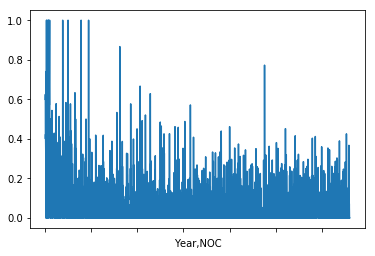

In [58]:
Ratio_entrant.plot()

# Inconclusive without further analysis but promising metric

In [21]:
data_merge['EntrantInt'] = 1

In [22]:
data_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,MedalInt
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1.0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,NaN


In [36]:
data_olympics.dtypes

ID            int64
Name         object
Sex          object
Age         float64
Height      float64
Weight      float64
Team         object
NOC          object
Games        object
Year          int64
Season       object
City         object
Sport        object
Event        object
Medal        object
MedalInt    float64
dtype: object

## Population and GDP Analysis

In [59]:
count_entrants = data_merge.groupby(['Year', 'NOC', 'Population','GDP']).agg({'MedalInt': sum, 'EntrantInt': sum,  'Population': min,'GDP': min, 'Year': min})


count_entrants.head()

MedalInt  EntrantInt  Population  \
Year NOC Population GDP                                              
1960 ARG 20619075.0 1.155739e+11       4.0         130  20619075.0   
     AUS 10276477.0 1.992333e+11      46.0         318  10276477.0   
     AUT 7047539.0  9.183670e+10       9.0         240   7047539.0   
     BEL 9153489.0  1.207649e+11       4.0         150   9153489.0   
     BRA 72207554.0 2.473419e+11      13.0          86  72207554.0   

                                           GDP  Year  
Year NOC Population GDP                               
1960 ARG 20619075.0 1.155739e+11  1.155739e+11  1960  
     AUS 10276477.0 1.992333e+11  1.992333e+11  1960  
     AUT 7047539.0  9.183670e+10  9.183670e+10  1960  
     BEL 9153489.0  1.207649e+11  1.207649e+11  1960  
     BRA 72207554.0 2.473419e+11  2.473419e+11  1960

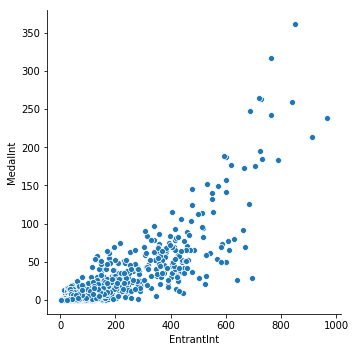

In [62]:

sns.pairplot(x_vars=["EntrantInt"], y_vars=["MedalInt"], data=count_entrants,height=5) 



## year filtering

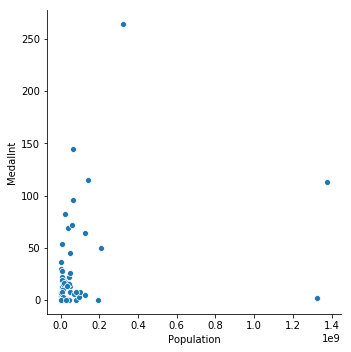

In [63]:

count_entrants_year = count_entrants[count_entrants.Year==2016]
#valid years 1960  1972  2016

sns.pairplot(x_vars=["Population"], y_vars=["MedalInt"], data=count_entrants_year,height=5) 



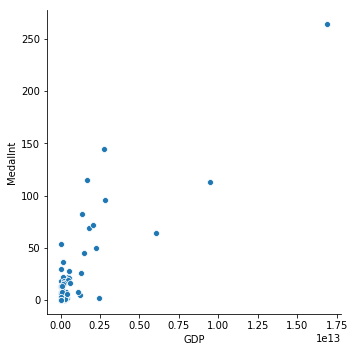

In [64]:
sns.pairplot(x_vars=["GDP"], y_vars=["MedalInt"], data=count_entrants_year,height=5) 

## K means clustering

In [65]:
data = []
for index,row in count_entrants_year.iterrows():
    Population = row['Population']
    MedalInt = row['MedalInt']
    count_entrants_year.append([float(Population),float(MedalInt)])
    

model = KMeans(n_clusters = 4)
model.fit(scale(count_entrants_year))

count_entrants_year['cluster'] = model.labels_.astype(float)

T:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


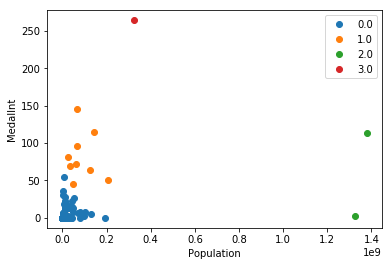

In [66]:
groups = count_entrants_year.groupby('cluster')

groups.head()
# Plot the clusters
fix,ax = plt.subplots()
for name, group in groups:
    ax.plot(group['Population'],group['MedalInt'],marker='o',linestyle='',label=name)
    
plt.xlabel('Population')
plt.ylabel('MedalInt')
ax.legend()

In [67]:
data = []
for index,row in count_entrants_year.iterrows():
    Population = row['GDP']
    MedalInt = row['MedalInt']
    count_entrants_year.append([float(Population),float(MedalInt)])
    

model = KMeans(n_clusters = 4)
model.fit(scale(count_entrants_year))

count_entrants_year['cluster'] = model.labels_.astype(float)

T:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


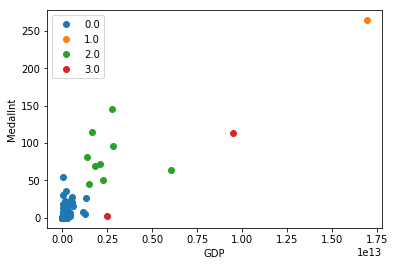

In [68]:
groups = count_entrants_year.groupby('cluster')

groups.head()
# Plot the clusters
fix,ax = plt.subplots()
for name, group in groups:
    ax.plot(group['GDP'],group['MedalInt'],marker='o',linestyle='',label=name)
    
plt.xlabel('GDP')
plt.ylabel('MedalInt')
ax.legend()

 # export a cluster

In [69]:
count_entrants_year[count_entrants_year['cluster']==3.0]

MedalInt  EntrantInt    Population  \
Year NOC Population   GDP                                                
2016 CHN 1.378665e+09 9.505157e+12     113.0         499  1.378665e+09   
     IND 1.324171e+09 2.466177e+12       2.0         130  1.324171e+09   

                                             GDP  Year  cluster  
Year NOC Population   GDP                                        
2016 CHN 1.378665e+09 9.505157e+12  9.505157e+12  2016      3.0  
     IND 1.324171e+09 2.466177e+12  2.466177e+12  2016      3.0